# 1. Reading Data

In [118]:
# Import General Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from fastai.imports import *
# from fastai.structured import *
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
# from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout, Activation
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [129]:
#reading data
df = pd.read_csv("/Users/rakeshravi/Downloads/UCI_Credit_Card.csv")
df["MARRIAGE"].replace([0], 3, inplace=True)
df["EDUCATION"].replace([0,5,6], 4, inplace=True)
collist = ['AGE','SEX','EDUCATION','MARRIAGE']
for col in collist:
    df[col] = df[col].astype('category',copy=False)

In [130]:
#data prep for Neural Network

#converting sex, marriage, age and education into one-hot
df = pd.get_dummies(df)
df.rename(columns={'default.payment.next.month':'default'}, inplace=True)
y = df["default"]
df = df.drop(["default"], axis = 1)

#train and test splitting
def split_vals(a,n): 
    return a[:n].copy(), a[n:].copy()

n_valid = 5000  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train_IDs = X_train["ID"]
X_train_s = X_train.drop(["ID"], axis = 1)
X_valid_IDs = X_valid["ID"]
X_valid_s = X_valid.drop(["ID"], axis = 1)

#standardising training and testing datasets to ensure that features are normalized
X_train = StandardScaler().fit_transform(X_train)
X_valid = StandardScaler().fit_transform(X_valid)
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Best Supervised Model (ANN)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=85, activation="relu", kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from

Epoch 1/10
25000/25000 [==============================] - 1s 38us/step - loss: 0.5517 - acc: 0.7769
Epoch 2/10
25000/25000 [==============================] - 0s 12us/step - loss: 0.4790 - acc: 0.7769
Epoch 3/10
25000/25000 [==============================] - 0s 12us/step - loss: 0.4725 - acc: 0.7769
Epoch 4/10
25000/25000 [==============================] - 0s 12us/step - loss: 0.4664 - acc: 0.7862
Epoch 5/10
25000/25000 [==============================] - 0s 12us/step - loss: 0.4581 - acc: 0.8121
Epoch 6/10
25000/25000 [==============================] - 0s 12us/step - loss: 0.4524 - acc: 0.8144
Epoch 7/10
25000/25000 [==============================] - 0s 12us/step - loss: 0.4471 - acc: 0.8152
Epoch 8/10
25000/25000 [==============================] - 0s 12us/step - loss: 0.4429 - acc: 0.8144
Epoch 9/10
25000/25000 [==============================] - 0s 13us/step - loss: 0.4405 - acc: 0.8166
Epoch 10/10
25000/25000 [==============================] - 0s 13us/step - loss: 0.4390 - acc: 0.8174

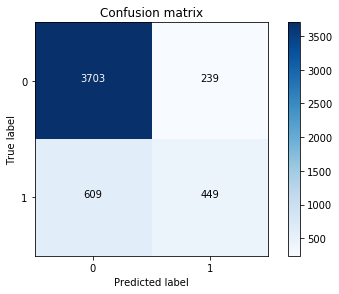

precision: 65.26162790697676
recall: 42.438563327032135
false positive rate: 6.062912227295788
accuracy 83.04
F1-score 0.5143184421534936
AUC 0.6818782554986818


In [132]:
#ANN model building and fitting
#picking a basic configuration
#slow decrement of units to learn more from each layer
#increasing batch size to 128 to get a larger read of data
model = Sequential()
model.add(Dense(50, input_dim=85, init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(20, init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='relu'))
model.add(Dense(5, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=128,  verbose=1)
predictions = model.predict(X_valid)
rounded = [round(x[0]) for x in predictions]

#confusion Matric
cm = confusion_matrix(y_valid, rounded)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm , classes=class_names, title='Confusion matrix')
plt.show()
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
F1 = 2 * (precision * recall) / (precision + recall)
Fpr, tpr, thresholds = roc_curve(y_valid, rounded)
roc_auc = auc(Fpr,tpr)
print("precision:", precision*100)
print("recall:", recall*100)
print("false positive rate:", fpr*100)
print("accuracy",  accuracy*100)
print("F1-score", F1)
print("AUC", roc_auc)

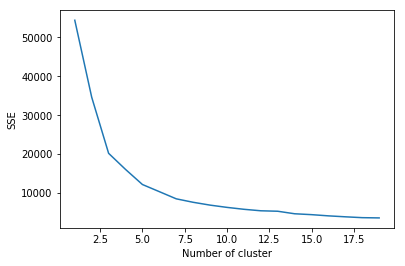

In [133]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

predic = pd.DataFrame(data = predictions)
x_2d['pred'] = pd.Series(predic.loc[:,0].astype('int')).values

sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(x_2d)
    x_2d["cluster"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [72]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)


Automatically created module for IPython interactive environment


In [ ]:
range_n_clusters = [3, 4, 5, 6,7]
x_2d.drop(["cluster"], axis = 1, inplace = True)
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_2d) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_2d)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_2d, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_2d, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x_2d.loc[:, 0], x_2d.loc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

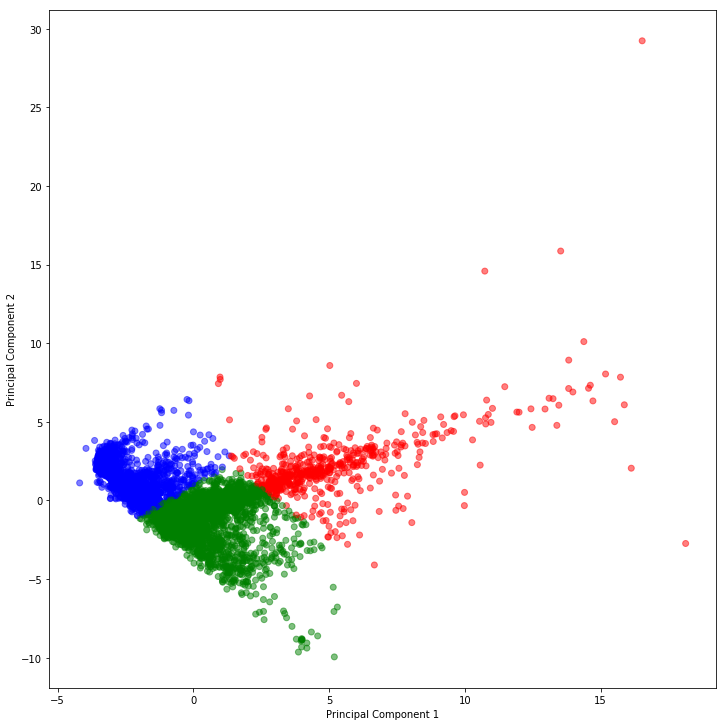

In [145]:
#Data Manipulation for standardising
k = pd.DataFrame(data = predictions)
df_final =  pd.DataFrame(data = X_valid)
# df_final['preds'] = pd.Series(k.loc[:,0].astype('int')).values
X = df_final.values

#Data Normalization
X_std = StandardScaler().fit_transform(X)
X_std[np.isnan(X_std)] = 0

#generating principal components for effective clustering and visualization
pca = PCA(n_components=2)
x_2d = pca.fit_transform(X_std)
x_2d =  pd.DataFrame(data = x_2d)
x_2d['pred'] = pd.Series(k.loc[:,0].astype('float')).values

#K-means Clustering
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_2d)


#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (10,10))
plt.scatter(x_2d.loc[:,0],x_2d.loc[:,1], c= label_color, alpha=0.5)
plt.tight_layout()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#from the chart below, its clear that there are three different types of users based on their payment behavior

In [146]:
pca = PCA(n_components=2)
x_2d = pca.fit_transform(X_std)
x_2d =  pd.DataFrame(data = x_2d)
x_2d['pred'] = pd.Series(k.loc[:,0].astype('float')).values

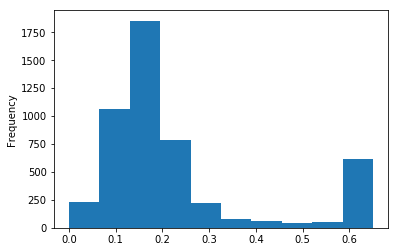

In [147]:
x_2d['pred'].plot('hist')

In [148]:
x_2d['pred'].max()

0.651080846786499

In [173]:
x_2d["cluster"]  = [ 0 if x < (0.23*x_2d['pred'].max()) else (1 if x < (0.5*x_2d['pred'].max()) else 2) for x in x_2d["pred"]]

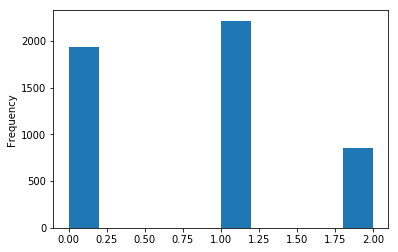

In [174]:
x_2d["cluster"].plot('hist')

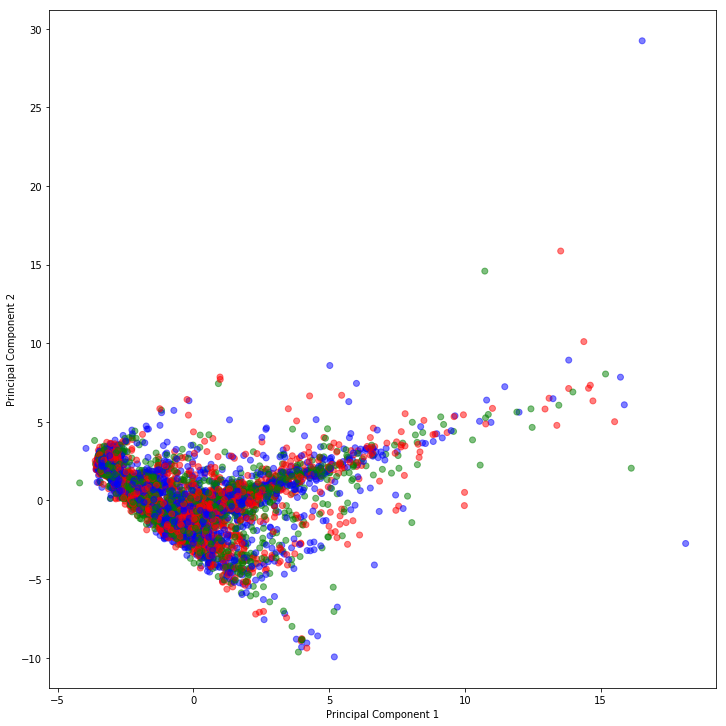

In [175]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in x_2d["cluster"].unique()]

# Plot the scatter digram
plt.figure(figsize = (10,10))
plt.scatter(x_2d.loc[:,0],x_2d.loc[:,1], c= label_color, alpha=0.5)
plt.tight_layout()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#from the chart below, its clear that there are three different types of users based on their payment behavior

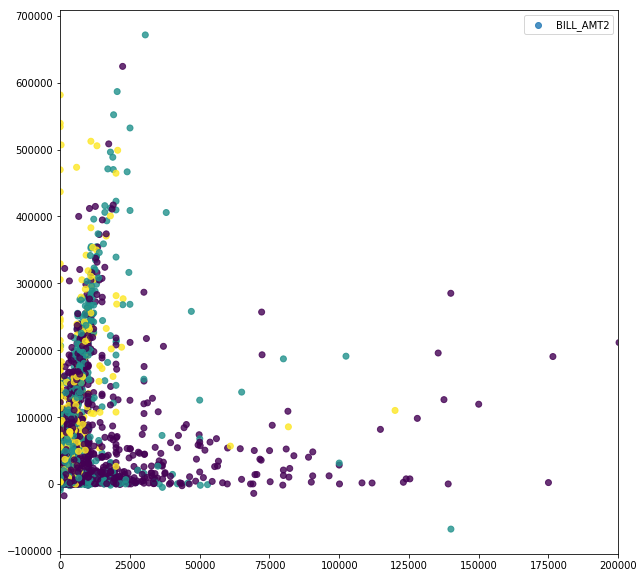

In [176]:
#train and test splitting
def split_vals(a,n): 
    return a[:n].copy(), a[n:].copy()

n_valid = 5000  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df, n_trn)
X_train_1, X_valid_1 = split_vals(df, n_trn)

plt.figure(figsize = (10,10))
plt.scatter(X_valid_1["PAY_AMT2"],X_valid_1["BILL_AMT2"], c= x_2d["cluster"], alpha=0.8) 
plt.xlim(0,200000)
plt.legend()
plt.show()
#when you perform clustering on the predicted probability of default and a few other variables, there are three 
# different user segments

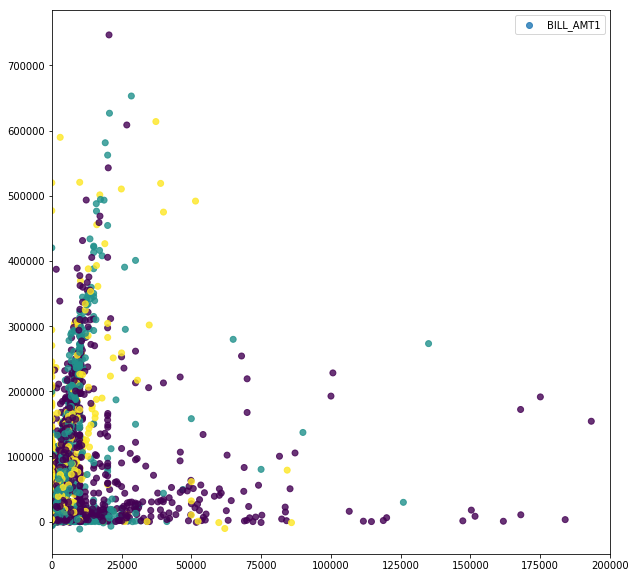

In [177]:
#train and test splitting
def split_vals(a,n): 
    return a[:n].copy(), a[n:].copy()

n_valid = 5000  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df, n_trn)
X_train_1, X_valid_1 = split_vals(df, n_trn)

plt.figure(figsize = (10,10))
plt.scatter(X_valid_1["PAY_AMT1"],X_valid_1["BILL_AMT1"], c= x_2d["cluster"], alpha=0.8) 
plt.xlim(0,200000)
plt.legend()
plt.show()
#when you perform clustering on the predicted probability of default and a few other variables, there are three 
# different user segments

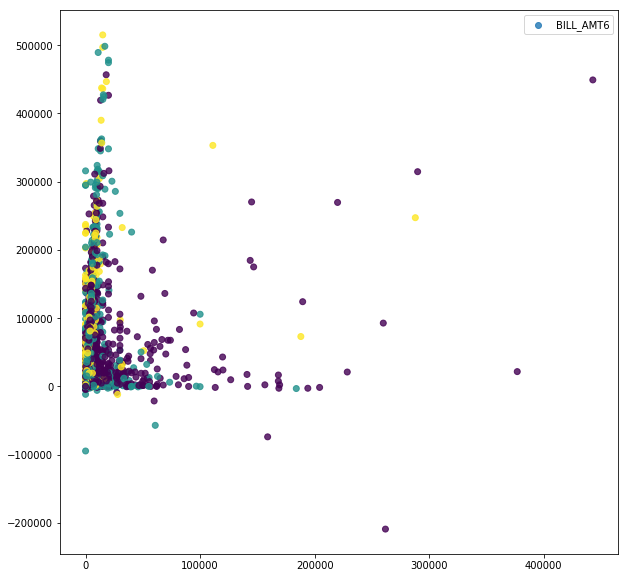

In [179]:
#train and test splitting
def split_vals(a,n): 
    return a[:n].copy(), a[n:].copy()

n_valid = 5000  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df, n_trn)
X_train_1, X_valid_1 = split_vals(df, n_trn)

plt.figure(figsize = (10,10))
plt.scatter(X_valid_1["PAY_AMT6"],X_valid_1["BILL_AMT6"], c= x_2d["cluster"], alpha=0.8) 
# plt.xlim(0,200000)
plt.legend()
plt.show()
#when you perform clustering on the predicted probability of default and a few other variables, there are three 
# different user segments